### Q1 Load and explore the training dataset. Explain the steps that you have taken.  

In [179]:

#Reference - https://github.com/code4kunal/eda-python-examples/blob/master/ensemble-techniques/Ensemble-techniques-assignment-kunal.ipynb
#

import sklearn
import pandas as pd 
import numpy as np 
import seaborn as sns

!pip install -U numpy scipy scikit-learn
!python3 -m pip install statsmodels --upgrade

!pip install imblearn 
# Basic packages

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline


# Models - LR, KNN,DT
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.dummy import DummyClassifier


# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [180]:
random_state = 100
np.random.seed(random_state)

In [181]:
data = pd.read_csv("train.csv")

In [182]:
#1 Understanding the data - create three plots for load, hourofday, dayofweek and ac / time

In [183]:
data.head(5)

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,105541,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,105542,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,105543,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,105544,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,105545,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


In [184]:
data.tail()

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
417715,523256,2.543,0,21,Tue,-0.003,0.003,0.0,0.0,0.0,0.0,0.0
417716,523257,2.417,0,21,Tue,-0.126,0.126,0.0,0.0,0.0,0.0,0.0
417717,523258,0.999,0,21,Tue,-1.418,1.418,0.0,0.0,0.0,0.0,0.0
417718,523259,0.966,0,21,Tue,-0.033,0.033,0.0,0.0,0.0,0.0,0.0
417719,523260,0.964,0,21,Tue,-0.002,0.002,0.0,0.0,0.0,0.0,0.0


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417720 entries, 0 to 417719
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  417720 non-null  int64  
 1   load        417720 non-null  float64
 2   ac          417720 non-null  int64  
 3   hourofday   417720 non-null  int64  
 4   dayofweek   417720 non-null  object 
 5   dif         417720 non-null  float64
 6   absdif      417720 non-null  float64
 7   max         417720 non-null  float64
 8   var         417720 non-null  float64
 9   entropy     417720 non-null  float64
 10  nonlinear   417720 non-null  float64
 11  hurst       417720 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 38.2+ MB


## Five point Summary 

In [271]:
#From https://github.com/code4kunal/eda-python-examples/blob/master/supervised-learning/Bank_loan_prediction_kunal_saxena.ipynb
data.describe(include = 'all')

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
count,417720.00000,417720.000000,417720.000000,417720.000000,417720,4.177200e+05,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,61440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,314400.50000,2.184664,0.242265,11.484487,NaN,-7.038207e-07,0.159578,3.977086,1.871247,0.707766,1.468806,0.972744
std,120585.52156,1.890565,0.428454,6.920358,NaN,5.309284e-01,0.506379,2.131094,1.787633,0.094367,2.610744,0.065439
min,105541.00000,0.298000,0.000000,0.000000,NaN,-7.970000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209970.75000,0.807000,0.000000,5.000000,NaN,-1.100000e-02,0.002000,1.786000,0.077337,0.645582,0.271757,0.987936
50%,314400.50000,1.279000,0.000000,11.000000,NaN,-1.000000e-03,0.010000,4.652000,1.984612,0.676446,0.698592,0.992059
75%,418830.25000,3.358000,0.000000,17.000000,NaN,8.000000e-03,0.043000,5.446000,3.508556,0.740986,1.598501,0.993138


In [187]:
data.shape

(417720, 12)

In [188]:
data.nunique() #unique values in each column

Unnamed: 0    417720
load            8522
ac                 2
hourofday         24
dayofweek          7
dif             7678
absdif          4379
max             7056
var           416481
entropy       417284
nonlinear     417596
hurst         394423
dtype: int64

In [189]:
#Check for any missing values
data.isnull().sum()

Unnamed: 0    0
load          0
ac            0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
dtype: int64

## Distribution of Variables

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='load', ylabel='Density'>

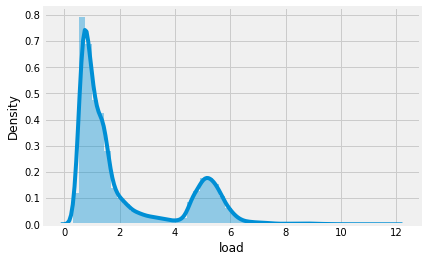

In [190]:
sns.distplot(data['load']) #distribution of load variable

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hourofday', ylabel='Density'>

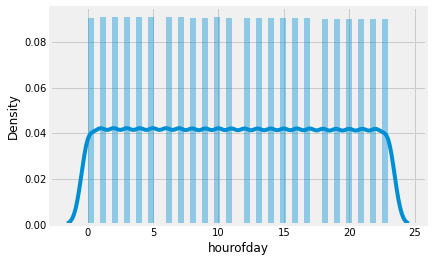

In [191]:
sns.distplot(data['hourofday'])

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ac', ylabel='Density'>

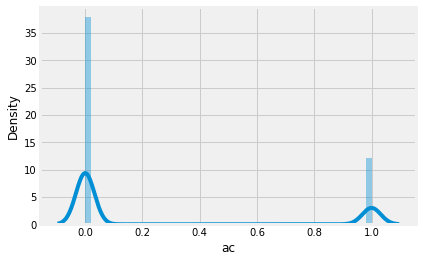

In [192]:
sns.distplot(data['ac']) #distribution of the variable

/Users/pranithagaddam/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='entropy', ylabel='Density'>

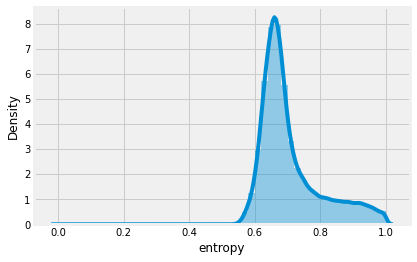

In [193]:
sns.distplot(data['entropy'])

0    316521
1    101199
Name: ac, dtype: int64

<AxesSubplot:>

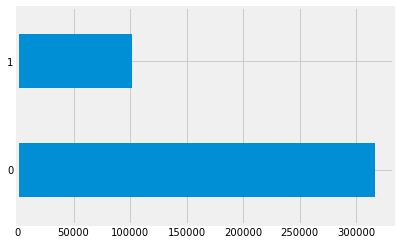

In [194]:
display(data['ac'].value_counts())
data['ac'].value_counts()[:20].plot(kind='barh')

/var/folders/j0/q9zz5mhj0t92pnl_m13g270w0000gn/T/ipykernel_14387/466343800.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


Text(0.5, 1.0, 'Correlation Matrix of Energy Data')

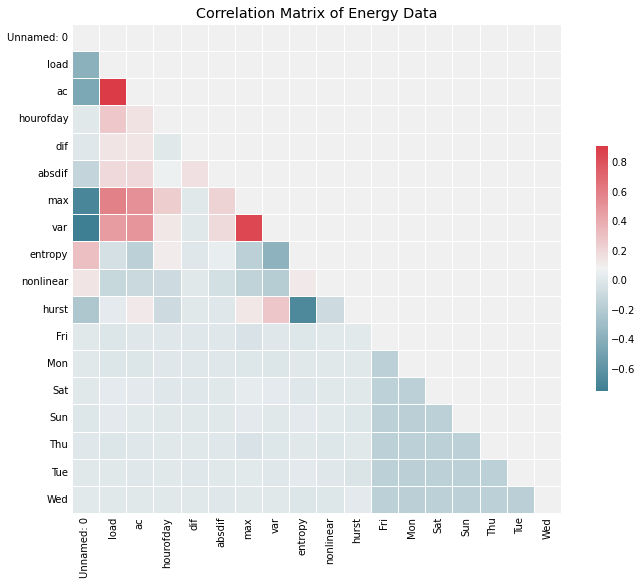

In [195]:
# Correlation matrix for all variables
corr = energy.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
ax.set_title('Correlation Matrix of Energy Data')

## Create visualisations

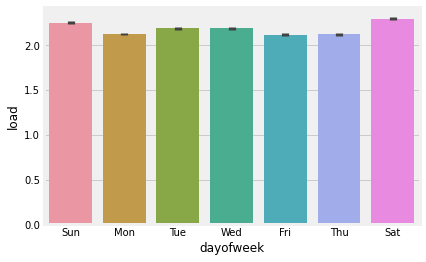

In [196]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

sn.barplot(x="dayofweek",y="load",data=data)
plt.show()

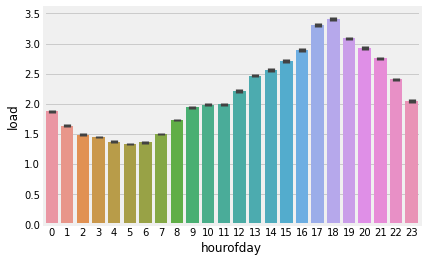

In [197]:
sn.barplot(x="hourofday",y="load",data=data)
plt.show()

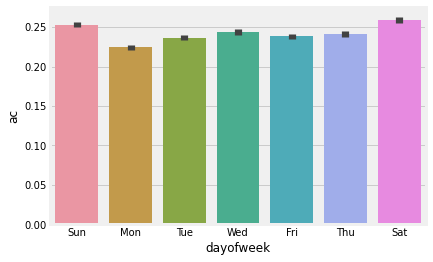

In [198]:
sn.barplot(x="dayofweek",y="ac",data=data)
plt.show()

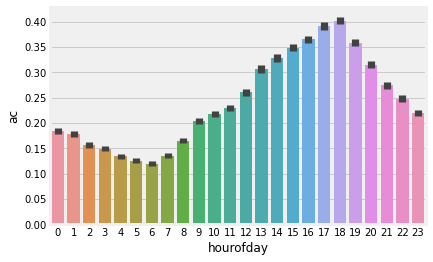

In [199]:
sn.barplot(x="hourofday",y="ac",data=data)
plt.show()

## Multivariate Analysis 

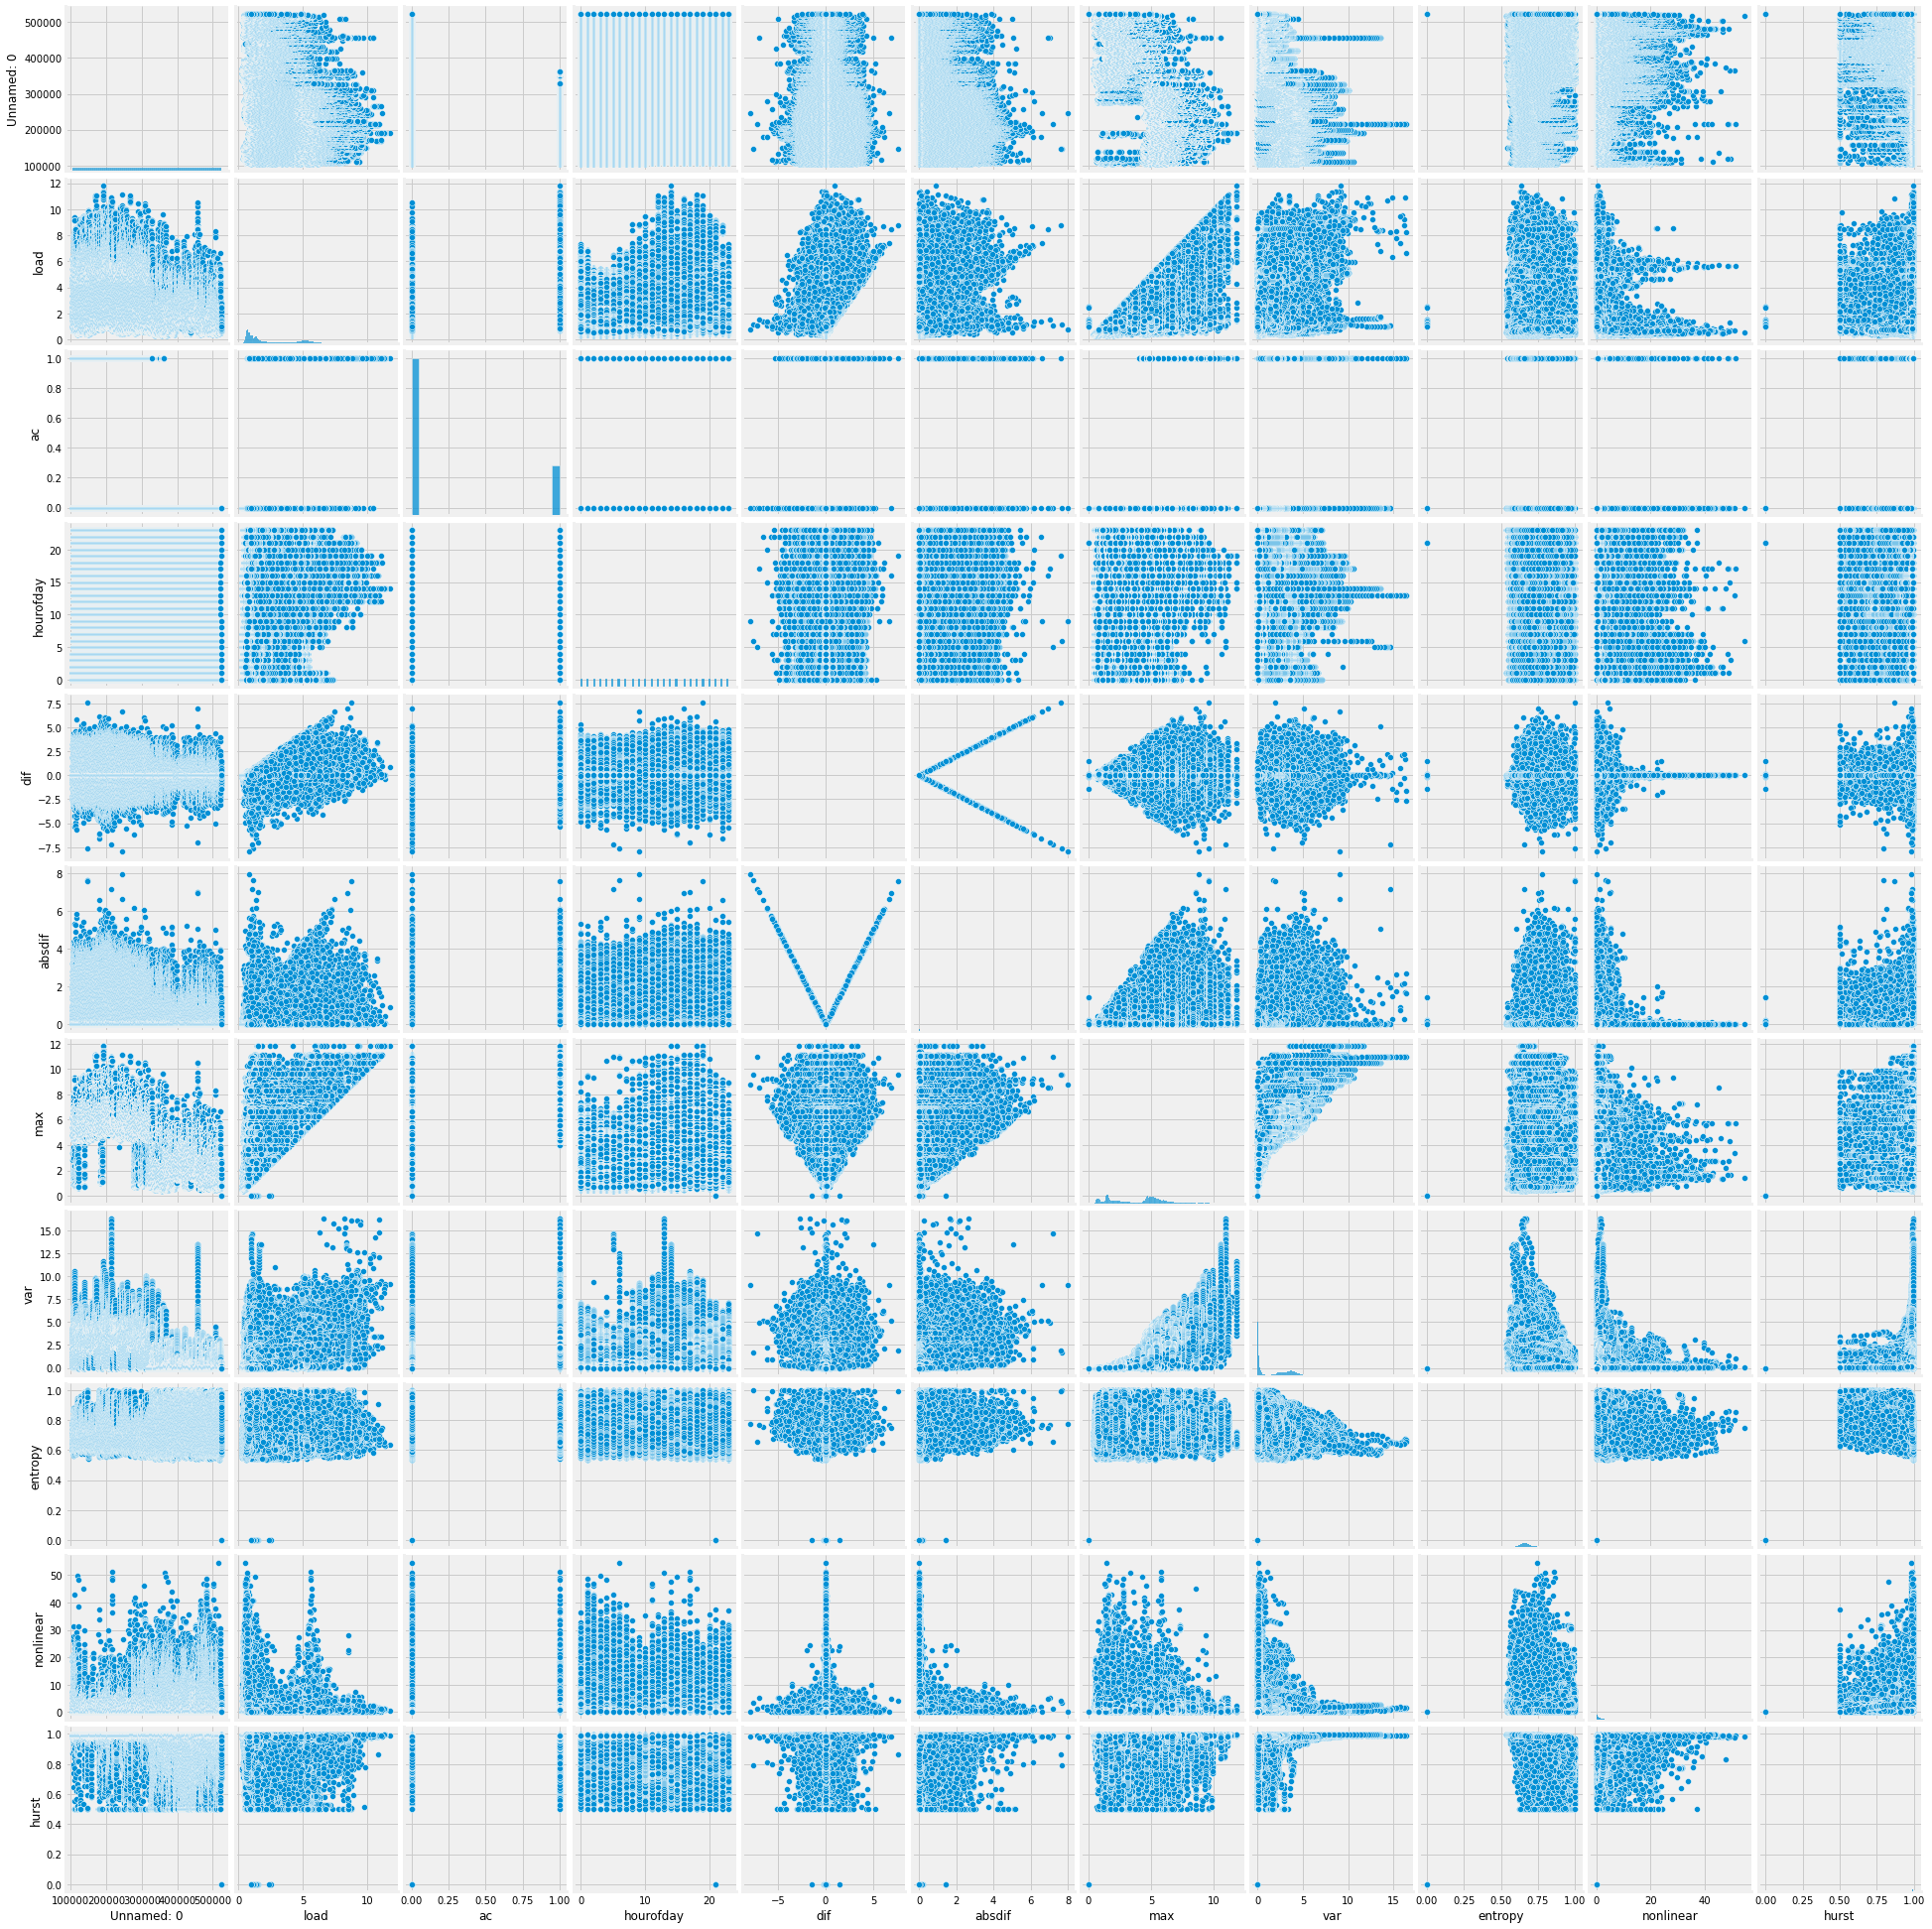

In [26]:
sns.pairplot(data)

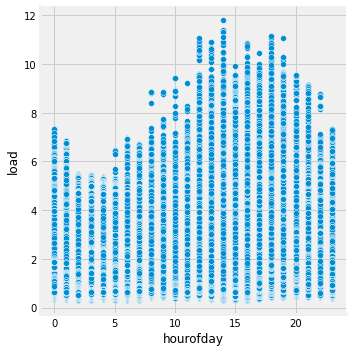

In [200]:
sns.relplot(x='hourofday',y='load', data = data)

### Q2.	Analyse the importance of the features for predicting air conditioner status using two different approaches.

In [201]:
#Get dummies 

x = pd.get_dummies(data['dayofweek'])

In [202]:
energy = data.join(x)
energy

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,105541,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071,0,0,0,1,0,0,0
1,105542,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154,0,0,0,1,0,0,0
2,105543,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220,0,0,0,1,0,0,0
3,105544,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150,0,0,0,1,0,0,0
4,105545,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417715,523256,2.543,0,21,Tue,-0.003,0.003,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
417716,523257,2.417,0,21,Tue,-0.126,0.126,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
417717,523258,0.999,0,21,Tue,-1.418,1.418,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
417718,523259,0.966,0,21,Tue,-0.033,0.033,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0


## Feature Importance

## Chi2 feature selection

In [204]:
energy    

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,105541,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071,0,0,0,1,0,0,0
1,105542,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154,0,0,0,1,0,0,0
2,105543,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220,0,0,0,1,0,0,0
3,105544,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150,0,0,0,1,0,0,0
4,105545,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417715,523256,2.543,0,21,Tue,-0.003,0.003,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
417716,523257,2.417,0,21,Tue,-0.126,0.126,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
417717,523258,0.999,0,21,Tue,-1.418,1.418,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0
417718,523259,0.966,0,21,Tue,-0.033,0.033,0.000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0


In [205]:
X = energy.iloc[:,[1,3,7,8,9,10,11,12,13,14,15,16,17,18]]   
y = energy.iloc[:,2]

In [206]:
#From https://github.com/krishnadulal/Feature-Selection-in-Machine-Learning-using-Python-All-Code/tree/master/Filtering%20Method
#From https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
from sklearn.feature_selection import chi2

sklearn.feature_selection.chi2(X, y)

(array([5.63620052e+05, 3.99093010e+04, 1.28150014e+05, 1.73963331e+05,
        1.42767245e+02, 1.94470004e+04, 2.55393169e+01, 4.13790067e+00,
        1.07432226e+02, 8.84745145e+01, 3.85898220e+01, 6.10375228e-01,
        1.02410883e+01, 1.02742709e+00]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.60878986e-33, 0.00000000e+00, 4.33459404e-07, 4.19331430e-02,
        3.57938852e-25, 5.14940538e-21, 5.22908986e-10, 4.34646565e-01,
        1.37346532e-03, 3.10763736e-01]))

### Best features are - load, hourofday, max, var, entropy, nonlinear, hurst, Mon, Sat, Sun.

## Univariate Analysis

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [208]:
# Calculate Univariate Statistical measure between each variable and target
univariate = f_classif(X.fillna(0), y)
univariate

(array([1.96536057e+06, 9.79475182e+03, 1.53445765e+05, 1.34719814e+05,
        1.16637589e+04, 4.23317743e+03, 5.88307496e+03, 4.80858925e+00,
        1.25996156e+02, 1.02787486e+02, 4.50595397e+01, 7.10842962e-01,
        1.19751695e+01, 1.20136610e+00]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.83187683e-02,
        3.11066552e-29, 3.75511184e-24, 1.91376492e-11, 3.99164594e-01,
        5.39195435e-04, 2.73049442e-01]))

In [209]:
#Capture P values in a series
univariate = pd.Series(univariate[1])
univariate.index = X.columns
univariate.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

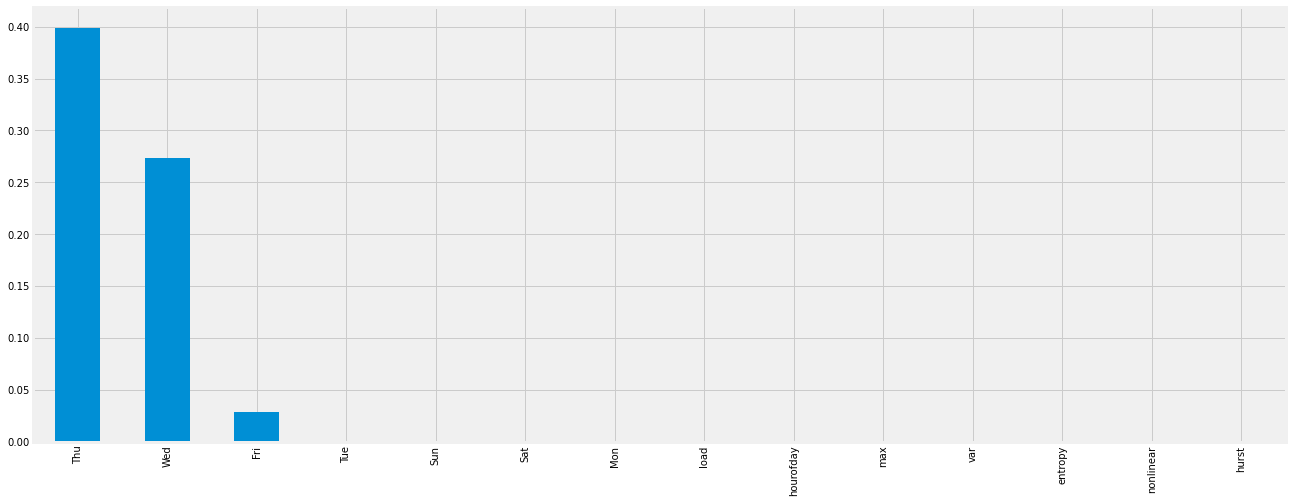

In [210]:
#Plot the P values
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [211]:
# Select K best Features
k_best_features = SelectKBest(f_classif, k=10).fit(X.fillna(0), y)
X.columns[k_best_features.get_support()]

Index(['load', 'hourofday', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
       'Mon', 'Sat', 'Sun'],
      dtype='object')

### The best features are = load, hourofday, max, var, entropy, nonlinear, hurst, Mon, Sat, Sun

## Q3.	Based on the training data, create three supervised machine learning (ML) models except any ensemble approach for predicting air conditioner status 

In [212]:
X_train = energy.iloc[:,[1,3,7,8,9,10,11,13,14,15]]
y_train = energy.iloc[:,2]


#cols = ["load", "hourofday","max","var","entropy","nonlinear","hurst","Mon","Sat","Sun"]
#X_train = energy[cols]
#y_train = energy["ac"]


In [213]:
energy.isnull().sum()

Unnamed: 0    0
load          0
ac            0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
Fri           0
Mon           0
Sat           0
Sun           0
Thu           0
Tue           0
Wed           0
dtype: int64

In [219]:
data2 = pd.read_csv("test.csv")
data2

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,1,1.869,0,0,Mon,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
1,2,1.673,0,0,Mon,-0.196,0.196,0.000,0.000000,0.000000,0.000000,0.000000
2,3,1.660,0,0,Mon,-0.013,0.013,0.000,0.000000,0.000000,0.000000,0.000000
3,4,1.772,0,0,Mon,0.112,0.112,0.000,0.000000,0.000000,0.000000,0.000000
4,5,1.679,0,0,Mon,-0.093,0.093,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
105535,105536,1.076,0,23,Sat,-0.001,0.001,6.204,2.484129,0.592658,0.042413,0.990185
105536,105537,1.019,0,23,Sat,-0.057,0.057,6.215,2.614626,0.601761,0.038118,0.990529
105537,105538,1.014,0,23,Sat,-0.005,0.005,6.215,2.729923,0.629122,0.048229,0.993554
105538,105539,1.011,0,23,Sat,-0.003,0.003,6.215,2.868153,0.658328,0.046729,0.993813


In [214]:
data2 = pd.read_csv("test.csv")
data2
r = pd.get_dummies(data2['dayofweek'])
r
con = data2.join(r)
con

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,1,1.869,0,0,Mon,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
1,2,1.673,0,0,Mon,-0.196,0.196,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
2,3,1.660,0,0,Mon,-0.013,0.013,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
3,4,1.772,0,0,Mon,0.112,0.112,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
4,5,1.679,0,0,Mon,-0.093,0.093,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105535,105536,1.076,0,23,Sat,-0.001,0.001,6.204,2.484129,0.592658,0.042413,0.990185,0,0,1,0,0,0,0
105536,105537,1.019,0,23,Sat,-0.057,0.057,6.215,2.614626,0.601761,0.038118,0.990529,0,0,1,0,0,0,0
105537,105538,1.014,0,23,Sat,-0.005,0.005,6.215,2.729923,0.629122,0.048229,0.993554,0,0,1,0,0,0,0
105538,105539,1.011,0,23,Sat,-0.003,0.003,6.215,2.868153,0.658328,0.046729,0.993813,0,0,1,0,0,0,0


In [215]:
con.isnull().sum()

Unnamed: 0    0
load          0
ac            0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
Fri           0
Mon           0
Sat           0
Sun           0
Thu           0
Tue           0
Wed           0
dtype: int64

In [216]:
con

,Unnamed: 0,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,1,1.869,0,0,Mon,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
1,2,1.673,0,0,Mon,-0.196,0.196,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
2,3,1.660,0,0,Mon,-0.013,0.013,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
3,4,1.772,0,0,Mon,0.112,0.112,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
4,5,1.679,0,0,Mon,-0.093,0.093,0.000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105535,105536,1.076,0,23,Sat,-0.001,0.001,6.204,2.484129,0.592658,0.042413,0.990185,0,0,1,0,0,0,0
105536,105537,1.019,0,23,Sat,-0.057,0.057,6.215,2.614626,0.601761,0.038118,0.990529,0,0,1,0,0,0,0
105537,105538,1.014,0,23,Sat,-0.005,0.005,6.215,2.729923,0.629122,0.048229,0.993554,0,0,1,0,0,0,0
105538,105539,1.011,0,23,Sat,-0.003,0.003,6.215,2.868153,0.658328,0.046729,0.993813,0,0,1,0,0,0,0


In [217]:
#TRAIN DATASET 
#cols = ["load", "hourofday","max","var","entropy","nonlinear","hurst","Mon","Sat","Sun"]
#X_train = energy[cols]
#y_train = energy["ac"]


#TEST DATASET - SAME AS ABOVE 
X_test = con.iloc[:,[1,3,7,8,9,10,11,13,14,15]]
y_test = con.iloc[:,2]

## Logistic Regression
Use different classification models (Logistic, K-NN and DT) to predict the air conditioner status.


In [231]:
#from https://gist.github.com/pb111/ca4680d8960c46aeb1b824a93a079fa7

from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
### Logistic Regression (lamda = 10) #change lambda 
lambda_val1 = 10
log_reg = LogisticRegression(C=1/lambda_val1, penalty='l2', max_iter=3000)
log_reg.fit(X_train, y_train)
y_pred1 = log_reg.predict(X_test)
model_acc = accuracy_score(y_pred1, y_test)
print("The Testing Accuracy is: {}".format(model_acc))
print("The Model coefficients are: {}".format(np.append(log_reg.intercept_, log_reg.coef_)))


The Model Accuracy is: 0.983778662118628
The Model coefficients are: [-4.42827323  2.49080649 -0.07812185 -0.50228827  1.02649272 -4.7305183
  0.01078231  0.01671586 -0.16386245 -0.36539173  0.17419316]


## Confusion Matrix 

In [232]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred1, y_test)
print(confusion_matrix)

[[95156   647]
 [ 1065  8672]]


## Classification Report - Precision, Recall, F1-Score, Support

In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     95803
           1       0.93      0.89      0.91      9737

    accuracy                           0.98    105540
   macro avg       0.96      0.94      0.95    105540
weighted avg       0.98      0.98      0.98    105540



In [234]:
from sklearn.metrics import cohen_kappa_score #for imbalanced classes
cohen_kappa_score(y_pred1, y_test)

0.9012486928715567

## Decision tree model

In [244]:
#from https://github.com/Eligijus112/decision-tree-python/blob/main/Decistion-tree.ipynb

from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# fit a classification tree with max_depth=5
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
print(X_train.shape)
# Fit our training data

treeclf.fit(X_train, y_train)

y_pred2 = treeclf.predict(X_test)
acc2 = accuracy_score(y_pred2, y_test)
print("The Testing Accuracy is: {}".format(acc2))
print("The Model coefficients are: {}".format(np.append(treeclf.intercept_, treeclf.coef_)))

(417720, 10)
Training accuracy: 0.9877908646940534
The Model Accuracy is: 0.9831059314004169
The Model coefficients are: [-4.42827323  2.49080649 -0.07812185 -0.50228827  1.02649272 -4.7305183
  0.01078231  0.01671586 -0.16386245 -0.36539173  0.17419316]


In [237]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred2, y_test)
print(confusion_matrix)

[[95436   998]
 [  785  8321]]


In [238]:
from sklearn.metrics import classification_report
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     96434
           1       0.89      0.91      0.90      9106

    accuracy                           0.98    105540
   macro avg       0.94      0.95      0.95    105540
weighted avg       0.98      0.98      0.98    105540



[Text(0.5, 0.9166666666666666, 'X[0] <= 4.092\ngini = 0.367\nsamples = 417720\nvalue = [316521, 101199]'),
 Text(0.25, 0.75, 'X[0] <= 2.418\ngini = 0.037\nsamples = 318901\nvalue = [312847, 6054]'),
 Text(0.125, 0.5833333333333334, 'X[0] <= 1.85\ngini = 0.012\nsamples = 298741\nvalue = [296917, 1824]'),
 Text(0.0625, 0.4166666666666667, 'X[0] <= 1.558\ngini = 0.005\nsamples = 277802\nvalue = [277057, 745]'),
 Text(0.03125, 0.25, 'X[3] <= 1.968\ngini = 0.003\nsamples = 256063\nvalue = [255671, 392]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.0\nsamples = 157466\nvalue = [157455, 11]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.008\nsamples = 98597\nvalue = [98216, 381]'),
 Text(0.09375, 0.25, 'X[3] <= 1.722\ngini = 0.032\nsamples = 21739\nvalue = [21386, 353]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.001\nsamples = 14892\nvalue = [14888, 4]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.097\nsamples = 6847\nvalue = [6498, 349]'),
 Text(0.1875, 0.4166666666666667, '

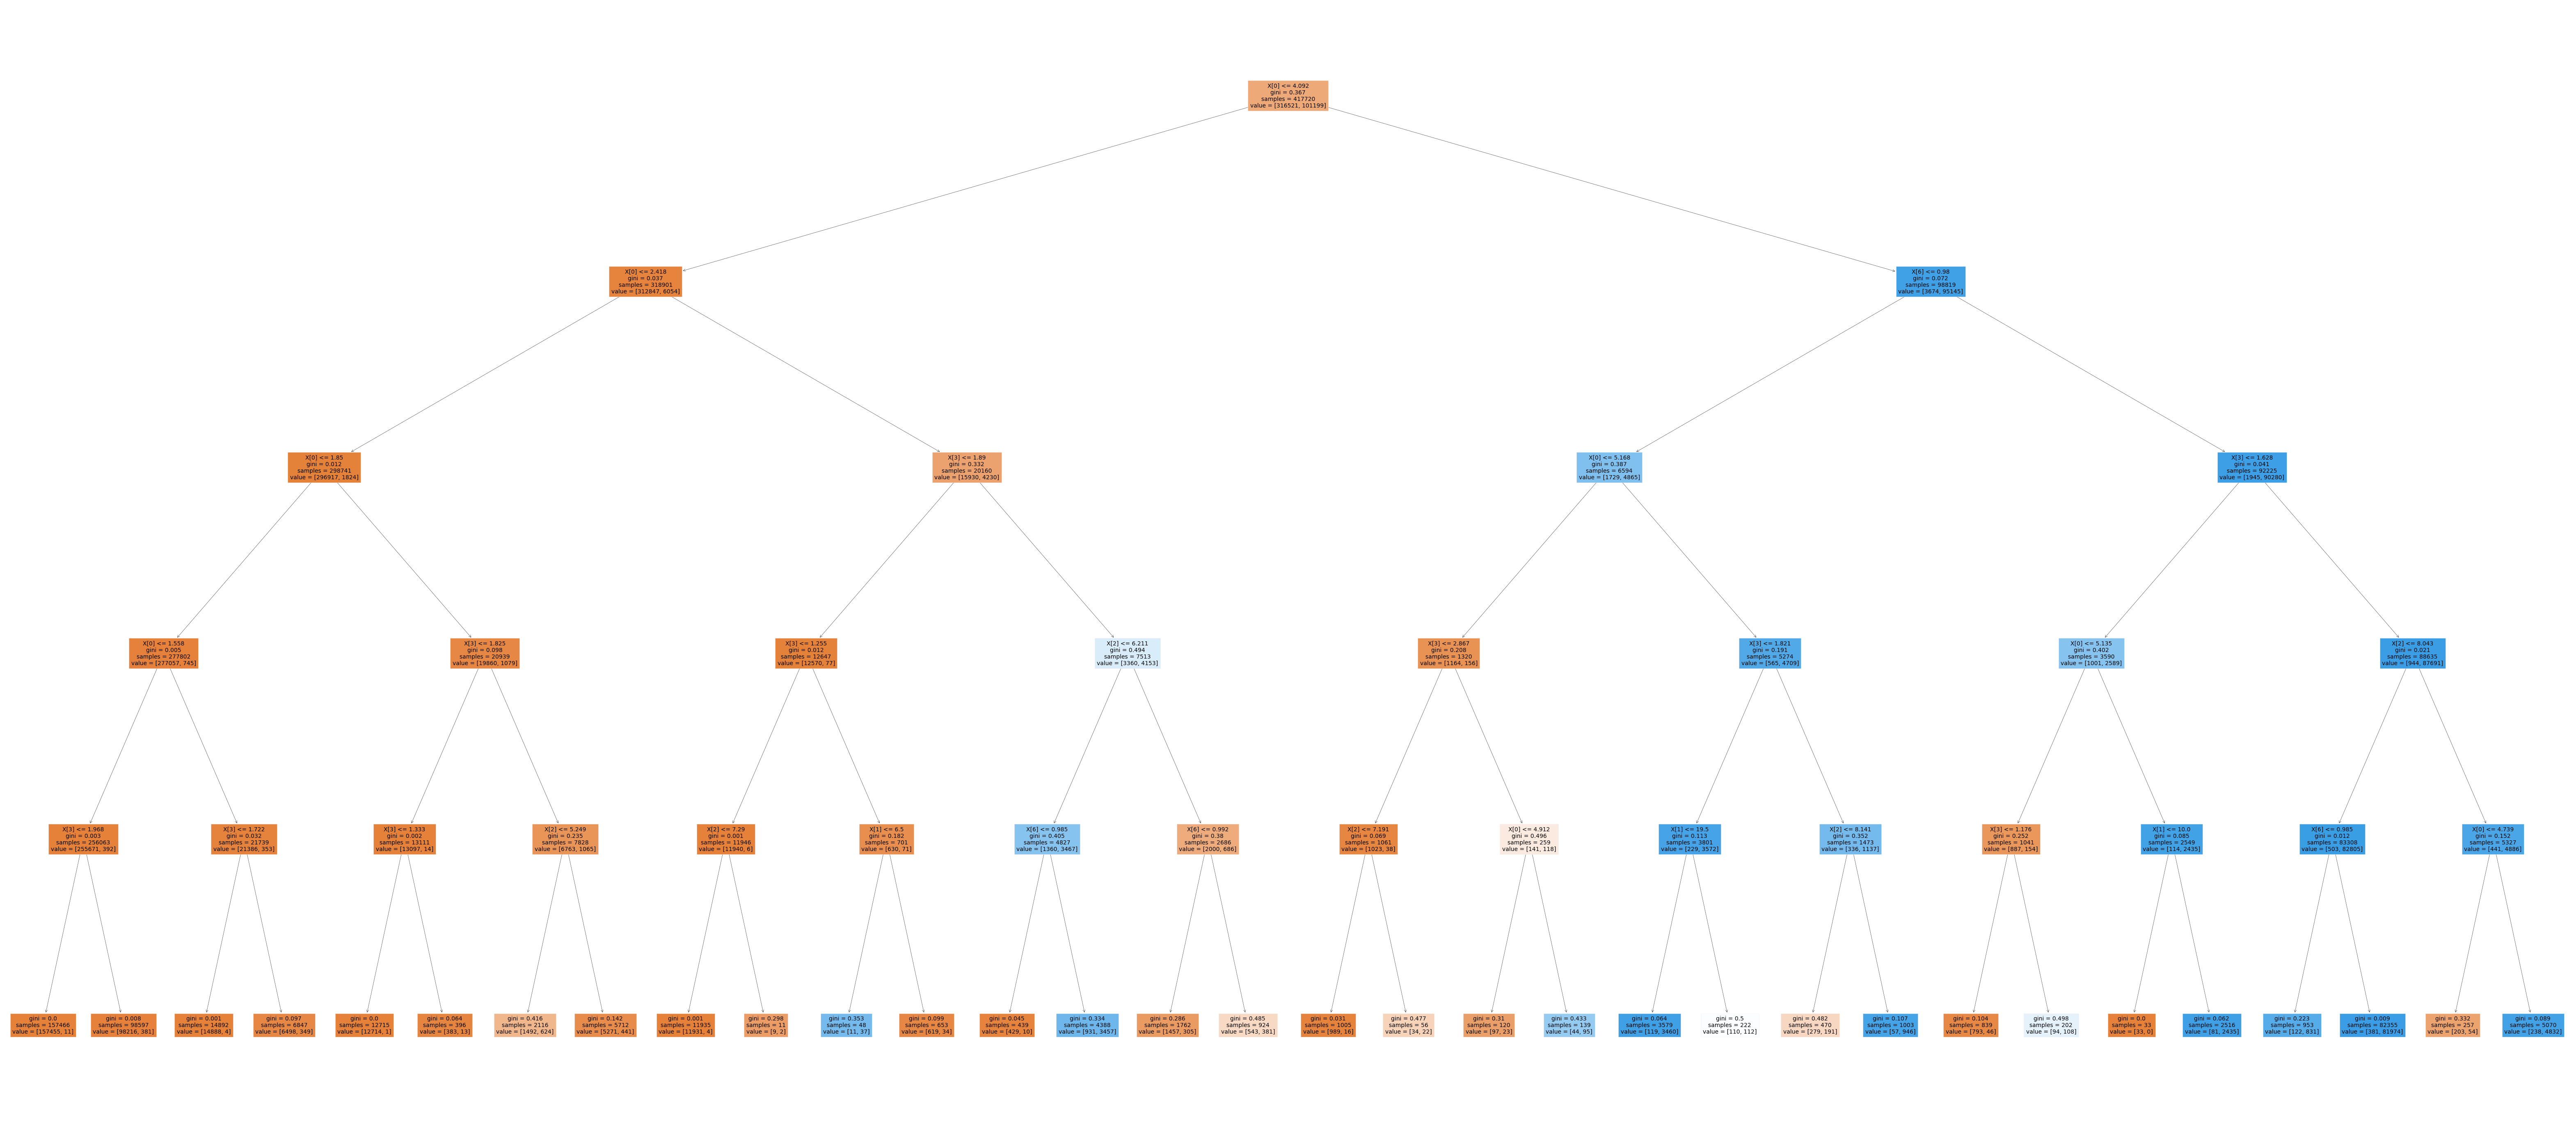

In [227]:
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(treeclf,filled=True)

## K-NN Classifier

In [243]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred3 = classifier.predict(X_test)
acc3 = accuracy_score(y_pred3, y_test)

print("The Testing Accuracy is: {}".format(acc3))
print("The Model coefficients are: {}".format(np.append(classifier.intercept_, classifier.coef_)))

The Model Accuracy is: 0.9776293348493462
The Model coefficients are: [-4.42827323  2.49080649 -0.07812185 -0.50228827  1.02649272 -4.7305183
  0.01078231  0.01671586 -0.16386245 -0.36539173  0.17419316]


In [254]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred3, y_test)
print(confusion_matrix)

[[95265  1405]
 [  956  7914]]


In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     96670
           1       0.85      0.89      0.87      8870

    accuracy                           0.98    105540
   macro avg       0.92      0.94      0.93    105540
weighted avg       0.98      0.98      0.98    105540



## Q-2 c) Have you optimised any hyper-parameters for each ML model? What are they? Why have you done that? Explain. 

In [270]:
#Logistic Regression with Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
### Logistic Regression (lambda = 15) #change lambda 
lambda_val1 = 8
log_regr = LogisticRegression(C=1/lambda_val1, penalty='l2', max_iter=3000)
log_regr.fit(X_train, y_train)
y_prediction = log_regr.predict(X_test)
model_accuracy = accuracy_score(y_prediction, y_test)
print("The Testing Accuracy is: {}".format(model_accuracy))
print("The Model coefficients are: {}".format(np.append(log_regr.intercept_, log_regr.coef_)))

The Testing Accuracy is: 0.9837502368770135
The Model coefficients are: [-4.13951101  2.49254748 -0.0780353  -0.49550902  1.01965462 -5.02386763
  0.01146135 -0.09339994 -0.16884211 -0.36868379  0.1751615 ]


In [260]:
#Decision Tree with Hyperparameter Tuning 

from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# fit a classification tree with max_depth=10
from sklearn.tree import DecisionTreeClassifier
treeclfr = DecisionTreeClassifier(max_depth=10, random_state=1)
print(X_train.shape)
# Fit our training data

treeclfr.fit(X_train, y_train)

y_preds = treeclfr.predict(X_test)
score = accuracy_score(y_pred2, y_test)
print("The Testing Accuracy is: {}".format(score))


(417720, 10)
The Testing Accuracy is: 0.9831059314004169


In [262]:
#KNN with Hyperparameter Tuning

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred3 = classifier.predict(X_test)
acc3 = accuracy_score(y_pred3, y_test)

print("The Testing Accuracy is: {}".format(acc3))

The Testing Accuracy is: 0.9782452150843283


## Q4) Given the same training and test data, build three ensemble models for predicting air conditioner status 

## AdaBoost Classifier

In [265]:
# AdaBoost Classifier
abcl = AdaBoostClassifier(n_estimators = 10, random_state = random_state)

print(X_train.shape)
# Fit our training data

abcl.fit(X_train, y_train)

acc_ABoost = abcl.score(X_train, y_train)
print('The training accuracy score is :{}'.format(acc_ABoost))

## Testing accuracy 
acc_ABoost1 = abcl.score(X_test, y_test)
print('The testing accuracy score is :{}'.format(acc_ABoost1))



(417720, 10)
The training accuracy score is :0.9767044910466341
The testing accuracy score is :0.983418609058177


## Gradient Boosting Classifier

In [266]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

print(X_train.shape)
# Fit our training data

gbcl.fit(X_train, y_train)


acc_GBoost = gbcl.score(X_train, y_train)
print('The training accuracy score is :{}'.format(acc_GBoost))

## Testing accuracy 
acc_GBoost1 = gbcl.score(X_test, y_test)
print('The testing accuracy score is :{}'.format(acc_GBoost1))


(417720, 10)
The training accuracy score is :0.9859355549171694
The testing accuracy score is :0.9851999241993556


## Random Forest Classifier 

In [267]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
print(X_train.shape)
# Fit our training data

rfc.fit(X_train, y_train)

y_pred6 = rfc.predict(X_test)
acc6 = accuracy_score(y_pred6, y_test)


print("The Testing Accuracy is: {}".format(acc6))
print("The Model coefficients are: {}".format(np.append(log_reg.intercept_, log_reg.coef_)))

(417720, 10)
The Testing Accuracy is: 0.9780178131514118
The Model coefficients are: [-4.42827323  2.49080649 -0.07812185 -0.50228827  1.02649272 -4.7305183
  0.01078231  0.01671586 -0.16386245 -0.36539173  0.17419316]


## Comparing model results

### Gradient Boosting Classifier has the highest testing accuracy out of all the ensemble models. 